# Competitive Landscape & Brand Dynamics
## Business Question
## How is the competitive landscape shifting over time?

# Import Libraries

In [13]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [14]:
# load data
df = pd.read_parquet("fmcg_cleaned.parquet")

# Brand market Share

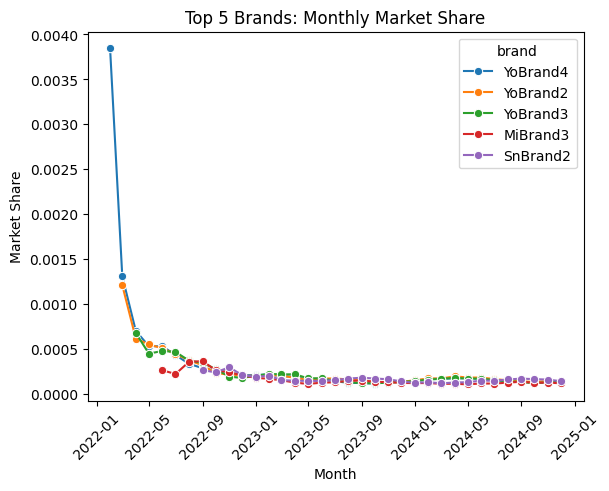

In [16]:
# brand market share
# Calculate each brand's revenue share per month
df['market_share'] = df.groupby('month')['revenue'].transform(lambda x: x / x.sum())

# Aggregate for plotting: sum market share per brand across months
brand_monthly_share = (
    df.groupby(['month','brand'])['market_share']
      .mean()
      .reset_index()
)
brand_monthly_share['month_dt'] = brand_monthly_share['month'].dt.to_timestamp()

sns.lineplot(
    data=brand_monthly_share[brand_monthly_share['brand'].isin(top_brands)],
    x='month_dt', y='market_share', hue='brand', marker='o'
)
plt.xticks(rotation=45)
plt.title("Top 5 Brands: Monthly Market Share")
plt.ylabel("Market Share")
plt.xlabel("Month")
plt.show()




## Brand Price Positioning

In [23]:
# Calculate each brand's average price
brand_price = df.groupby('brand')['price_unit'].mean().reset_index()

# Calculate Relative Price Index (RPI) vs market average
market_avg_price = df['price_unit'].mean()
brand_price['price_index'] = brand_price['price_unit'] / market_avg_price





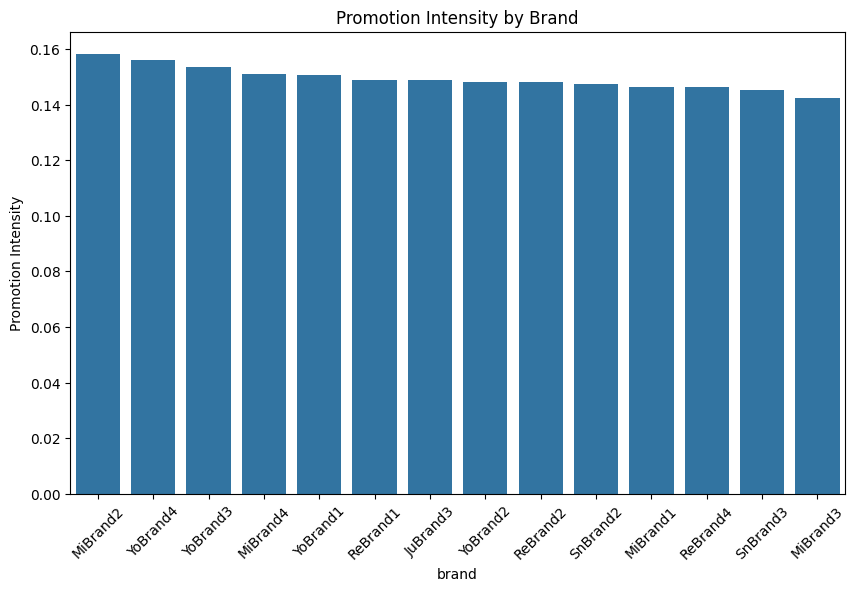

In [20]:
# Promotion intensity = proportion of sales sold under promotion
brand_promo = df.groupby('brand')['promotion_flag'].mean().reset_index()

# Plot top brands by promo intensity
plt.figure(figsize=(10,6))
sns.barplot(data=brand_promo.sort_values('promotion_flag', ascending=False),
            x='brand', y='promotion_flag')
plt.xticks(rotation=45)
plt.ylabel("Promotion Intensity")
plt.title("Promotion Intensity by Brand")
plt.show()


## Insights
### Some brands grow share via discount dependency rather than structural demand growth.

## Brand Share vs Promotion Scatter

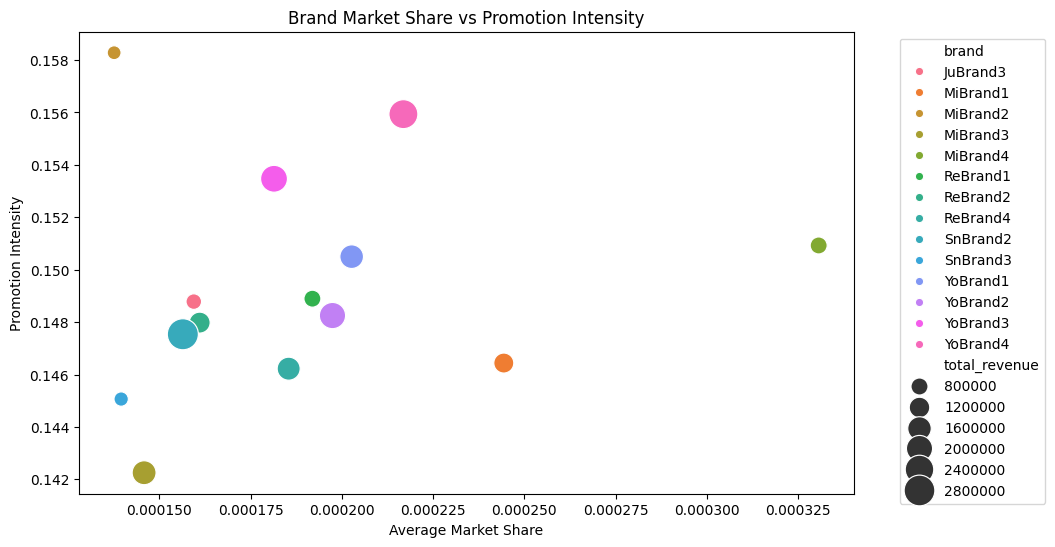

In [24]:
# Merge market share & promo intensity per brand
brand_summary = df.groupby('brand').agg(
    total_revenue=('revenue','sum'),
    avg_market_share=('market_share','mean'),
    promo_intensity=('promotion_flag','mean')
).reset_index()

# Scatter plot: share vs promo intensity
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_summary, 
                x='avg_market_share', 
                y='promo_intensity', 
                size='total_revenue', 
                hue='brand', 
                sizes=(100,500))
plt.xlabel("Average Market Share")
plt.ylabel("Promotion Intensity")
plt.title("Brand Market Share vs Promotion Intensity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


## Insights
### Some brands trade market share for promotion dependency and others maintain high share with low promotions.